# Model

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split

<h3 style= "color:blue;"> Importing Data Set </h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 1 - Articles /Preprocessed.csv",index_col=[0])

In [6]:
# change both types into string
df['content'] = df['content'].astype('str')
df['fileclass'] = df['fileclass'].astype('str')

In [7]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['content'],keep="first")

<b> Before moving ahead let's convert the fileclass into integer format, as it will make our work easy!!</b>

In [8]:
# Convert filecalss into int values
classes={'ChildProtection':0,'Cybersecurity':1,'DataPrivacy':2,'DataSystemsDevelopment':3,
         'DigitalFinance':4,'DigitalInclusion':5,'DigitalInformatioServices':6,
         'DigitalInfrastructure':7,'DigitalLiteracy':8,'DigitalServices':9,'Egovernment':10,'Upskilling':11
         }
# map the filecalss values
df['classes']=df['fileclass'].map(classes)

# drop the fileclass axis
df.drop(['fileclass'], axis=1,inplace=True)

In [9]:
texts = df['content'].values
labels = df['classes'].values

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [10]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences
max_length = 50000  # maximum sequence length
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

In [11]:
vocab_size = len(tokenizer.word_index) + 1  # vocabulary size

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50000, 100)        1929400   
                                                                 
 conv1d (Conv1D)             (None, 49996, 128)        64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                780       
                                                        

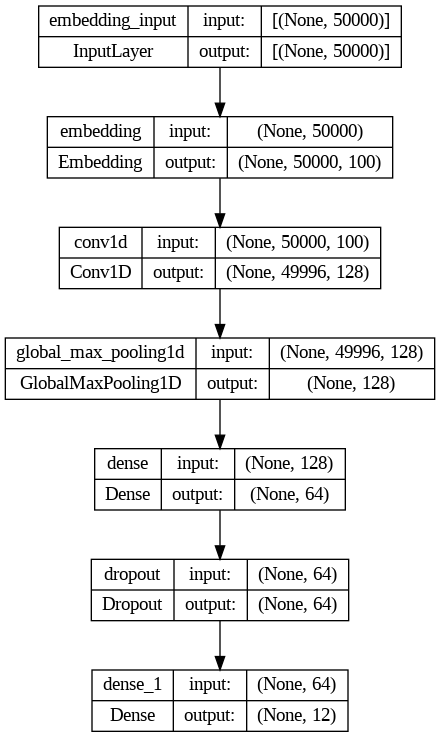

In [24]:
# Visualize the model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
epochs = 10
batch_size = 64

model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_data, test_labels))

Epoch 1/10
7/7 [==============================] - 193s 27s/step - loss: 2.4632 - accuracy: 0.1814 - val_loss: 2.4161 - val_accuracy: 0.2649
Epoch 2/10
7/7 [==============================] - 194s 28s/step - loss: 2.3732 - accuracy: 0.2326 - val_loss: 2.3645 - val_accuracy: 0.2649
Epoch 3/10
7/7 [==============================] - 185s 27s/step - loss: 2.2723 - accuracy: 0.2395 - val_loss: 2.3235 - val_accuracy: 0.2649
Epoch 4/10
7/7 [==============================] - 186s 27s/step - loss: 2.2254 - accuracy: 0.2488 - val_loss: 2.2840 - val_accuracy: 0.2649
Epoch 5/10
7/7 [==============================] - 186s 27s/step - loss: 2.1538 - accuracy: 0.2884 - val_loss: 2.2610 - val_accuracy: 0.2649
Epoch 6/10
7/7 [==============================] - 185s 27s/step - loss: 2.0669 - accuracy: 0.2884 - val_loss: 2.2453 - val_accuracy: 0.2649
Epoch 7/10
7/7 [==============================] - 185s 27s/step - loss: 2.0135 - accuracy: 0.3140 - val_loss: 2.2190 - val_accuracy: 0.2649
Epoch 8/10
7/7 [====

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

6/6 [==============================] - 27s 5s/step - loss: 2.1363 - accuracy: 0.3027
Test Loss: 2.1363
Test Accuracy: 30.27%


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(test_labels, predicted_labels)

print(report)

6/6 [==============================] - 24s 4s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        28
           4       0.32      1.00      0.49        49
           5       0.22      0.32      0.26        22
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        10

    accuracy                           0.30       185
   macro avg       0.04      0.11      0.06       185
weighted avg       0.11      0.30      0.16       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
